In [1]:
%matplotlib inline

In [2]:
import numpy

In [3]:
import sys
sys.path.append('../')
import sourmash_lib
import sourmash_signature as sig

In [4]:
K=32

In [5]:
import glob
def load_series(globname):
    filelist = glob.glob(globname)
    xlist = []
    for name in filelist:
        n = int(name.split('.')[-1])
        if n % 1000000 != 0:
            continue
        data = open(name).read()
        s = sig.load_signatures(data, select_ksize=K)
        assert len(s) == 1
        s = s[0]
        s.estimator._truncate(500)
        xlist.append((n, s))
    xlist.sort()
    return xlist

In [6]:
sig_n_list = load_series('SRR2060939_1.fastq.gz.trimnoV.fq.gz.sig.*')


In [7]:
sig2_n_list = load_series('SRR2060939_2.fastq.gz.trimnoV.fq.gz.sig.*')


In [8]:
sig3_n_list = load_series('SRR2241509_1.fastq.gz.trimnoV.fq.gz.sig.*')

In [9]:
sig3b_n_list = load_series('SRR2255622_1.fastq.gz.trimnoV.fq.gz.sig.*')

In [10]:
sig4_n_list = load_series('SRR453566_1.fastq.gz.trimnoV.fq.gz.sig.*')
sig5_n_list = load_series('SRR453569_1.fastq.gz.trimnoV.fq.gz.sig.*')
sig6_n_list = load_series('SRR453570_1.fastq.gz.trimnoV.fq.gz.sig.*')

In [11]:
print(len(sig_n_list))
print(len(sig2_n_list))
print(len(sig3_n_list))
print(len(sig4_n_list))
print(len(sig5_n_list))
print(len(sig6_n_list))

33
31
35
5
3
6


In [12]:
for (n1, sig1), (n2, sig2) in zip(sig_n_list, sig2_n_list):
    assert n1 == n2
for (n1, sig1), (n3, sig3) in zip(sig_n_list, sig3_n_list):
    assert n1 == n3
for (n4, sig4), (n6, sig6) in zip(sig4_n_list, sig6_n_list):
    assert n4 == n6

## house mouse

In [13]:
x1 = [ n1 for (n1, sig1), (n2, sig2) in zip(sig_n_list, sig2_n_list) ]
y1 = [ sig1.jaccard(sig2) for (n1, sig1), (n2, sig2) in zip(sig_n_list, sig2_n_list) ]

In [14]:
x2 = [ n1 for (n1, sig1), (n3, sig3) in zip(sig_n_list, sig3_n_list) ]
y2 = [ sig1.jaccard(sig3) for (n1, sig1), (n3, sig3) in zip(sig_n_list, sig3_n_list) ]

x3 = [ n1 for (n1, sig1), (n2, sig2) in zip(sig3_n_list, sig3b_n_list) ]
y3 = [ sig1.jaccard(sig2) for (n1, sig1), (n2, sig2) in zip(sig3_n_list, sig3b_n_list) ]


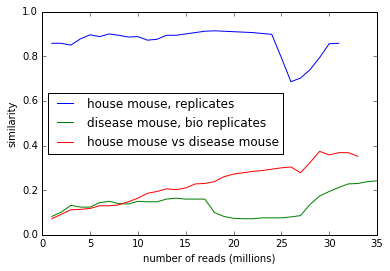

In [15]:
from matplotlib import pylab
pylab.plot(numpy.array(x1) / 1e6, y1, label='house mouse, replicates')
pylab.plot(numpy.array(x3) / 1e6, y3, label='disease mouse, bio replicates')
pylab.plot(numpy.array(x2) / 1e6, y2, label='house mouse vs disease mouse')


pylab.axis(ymin=0, ymax=1)
pylab.legend(loc='center left')
pylab.xlabel('number of reads (millions)')
pylab.ylabel('similarity')
pylab.savefig('mouse-replicates.pdf')

## yeast

In [16]:
x4 = [ n4 for (n4, sig4), (n6, sig6) in zip(sig4_n_list, sig6_n_list) ]
y4 = [ sig4.jaccard(sig6) for (n4, sig4), (n6, sig6) in zip(sig4_n_list, sig6_n_list) ]

(1000000.0, 5000000.0, 0, 1)

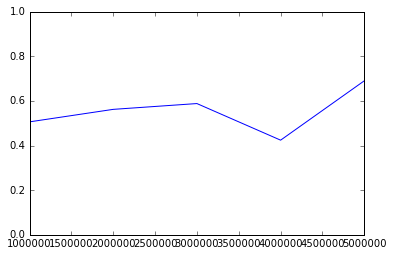

In [17]:
pylab.plot(x4, y4)
pylab.axis(ymin=0, ymax=1)

## schist mouse

In [18]:
xs = [ n1 for (n1, sig1), (n2, sig2) in zip(sig3_n_list, sig3b_n_list) ]
ys = [ sig1.jaccard(sig2) for (n1, sig1), (n2, sig2) in zip(sig3_n_list, sig3b_n_list) ]

(0.0, 35000000.0, 0, 0.5)

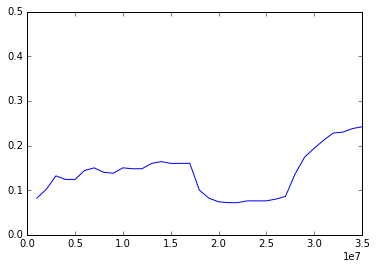

In [19]:
pylab.plot(numpy.array(xs), ys)
pylab.axis(ymax=0.5, ymin=0)


## versus ref


In [20]:
siglist = sig.load_signatures(open('../species/m_musculus.sig').read(), select_ksize=K)
ref = siglist[0]

In [21]:
x1r = [ n for (n, sig) in sig3_n_list ]
y1r = [ sig.jaccard(ref) for (n, sig) in sig3_n_list ]

In [22]:
x2r = [ n for (n, sig) in sig_n_list ]
y2r = [ s.jaccard(ref) for (n, s) in sig_n_list ]

In [23]:
x3r = [ n for (n, sig) in sig4_n_list ]
y3r = [ sig.jaccard(ref) for (n, sig) in sig4_n_list ]

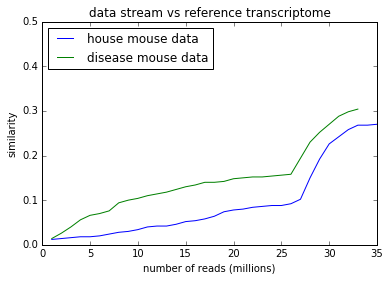

In [24]:
pylab.plot(numpy.array(x1r) / 1e6, y1r, label='house mouse data')
pylab.plot(numpy.array(x2r) / 1e6, y2r, label='disease mouse data')

pylab.axis(ymin=0, ymax=0.5)
pylab.xlabel('number of reads (millions)')
pylab.ylabel('similarity')
pylab.title('data stream vs reference transcriptome')
pylab.legend(loc='upper left')
pylab.savefig('mouse-reads-v-ref.pdf')


(1000000.0, 5000000.0, 0, 1)

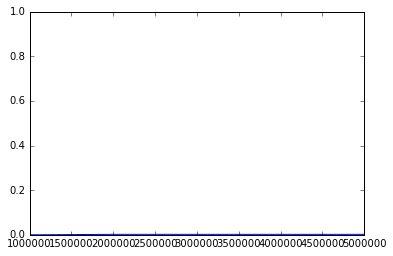

In [25]:
pylab.plot(x3r, y3r)
pylab.axis(ymin=0, ymax=1)

In [26]:
max(y3r)

0.002